# Chapter 4: Automated Feature Engineering and Data Preprocessing

This notebook provides a complete and robust implementation of the concepts discussed in Chapter 4, using a simulated **RetailMart E-commerce Dataset**. It covers everything from initial data profiling and quality assessment to advanced techniques for feature generation, selection, and multimodal fusion.

The code is designed to be self-contained, with fallbacks for optional dependencies.

### Contents:
1. Creating the RetailMart Dataset
2. Exploratory Data Analysis (EDA)
3. Intelligent Data Profiling & Statistics
4. Data Quality Assessment & Validation
5. Outlier Detection
6. Intelligent Type Detection
7. Advanced Categorical Encoding
8. Numerical Scaling and Normalization
9. DateTime Feature Extraction
10. Text Preprocessing and Feature Extraction
11. Automated Feature Generation
12. Feature Selection: Filter Methods
13. Feature Selection: Wrapper Methods
14. Fusion Strategy Diagrams
15. Multimodal Feature Fusion
16. Preprocessing Performance Monitoring
17. Summary and Best Practices

---
## 1. Creating the RetailMart Dataset

In [1]:
!pip install pandas numpy matplotlib seaborn textblob scipy scikit-learn ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

def create_retailmart_dataset(n_products=5000, n_reviews=15000):
    """
    Create comprehensive RetailMart e-commerce dataset.
    Matches the chapter text specifications exactly.

    Returns:
        products_df: Product catalog (5000 products)
        reviews_df: Customer reviews (15000 reviews)
        sales_df: Daily sales transactions
    """
    np.random.seed(42)
    random.seed(42)

    # Product categories and their typical price ranges (matches chapter)
    categories = {
        'Electronics': (50, 2000, ['Smartphones', 'Laptops', 'Headphones']),
        'Home & Garden': (25, 500, ['Furniture', 'Tools', 'Decor']),
        'Clothing': (15, 200, ['Shirts', 'Pants', 'Shoes']),
        'Books': (10, 50, ['Fiction', 'Non-fiction', 'Textbooks']),
        'Sports': (20, 300, ['Equipment', 'Apparel', 'Accessories'])
    }
    brands = [f'Brand_{i}' for i in range(1, 51)]

    # Product description templates
    description_templates = [
        "High-quality {category} product with excellent features. Perfect for everyday use. Our customers love the durability and design.",
        "Premium {brand} design meets functionality. A customer favorite with outstanding reviews. Built to last.",
        "Affordable and reliable {category} item. Great value for money. Satisfaction guaranteed.",
        "Top-rated by customers worldwide. Durable, long-lasting, and beautifully crafted. Best seller in {category}.",
        "Experience excellence with this {brand} product. Innovative features meet classic design. Highly recommended.",
        "Essential {category} item for your collection. Quality materials and expert craftsmanship. Five-star rated.",
    ]

    # Generate Products Data (matches chapter structure)
    products_data = []
    for i in range(n_products):
        category = np.random.choice(list(categories.keys()))
        min_price, max_price, subcats = categories[category]
        brand = np.random.choice(brands)

        # Base price with some data quality issues
        price = round(np.random.uniform(min_price, max_price), 2)
        if np.random.random() < 0.02:
            price *= np.random.choice([0.1, 10])  # Price error
        if np.random.random() < 0.03:
            price = -price  # Negative price

        # Product description (~2.1% missing)
        if np.random.random() < 0.021:
            description = None
        else:
            template = np.random.choice(description_templates)
            description = template.format(category=category, brand=brand)

        product = {
            'product_id': f'PROD_{i+1:05d}',
            'name': f'{category} Product {i+1}',
            'category': category,
            'subcategory': np.random.choice(subcats),
            'price': price,
            'brand': brand,
            'rating': round(np.random.uniform(1, 5), 1),
            'num_reviews': np.random.poisson(25),
            'in_stock': np.random.choice([True, False], p=[0.85, 0.15]),
            'stock_quantity': np.random.randint(0, 1000),
            'weight_oz': round(np.random.uniform(1, 50), 2),
            'length_in': round(np.random.uniform(5, 30), 1),
            'width_in': round(np.random.uniform(3, 20), 1),
            'height_in': round(np.random.uniform(2, 15), 1),
            'description': description,
            'created_date': datetime.now() - timedelta(days=np.random.randint(1, 730))
        }
        products_data.append(product)

    products_df = pd.DataFrame(products_data)

    # Introduce ~5% missing weights
    products_df.loc[products_df.sample(frac=0.05).index, 'weight_oz'] = np.nan

    # Review text templates based on rating
    positive_phrases = [
        "Excellent product, highly recommend! The quality exceeded my expectations in every way.",
        "Love it, works perfectly. Best purchase I've made this year. Would buy again.",
        "Great quality for the price. Shipped fast and arrived in perfect condition.",
        "Exceeded my expectations in every way. Amazing value and fantastic quality.",
        "Best purchase I've made this year. Five stars all the way!",
        "Amazing value, very satisfied with this product. Highly recommended to everyone.",
        "Would buy again without hesitation. Fantastic product!",
        "Fantastic product, five stars all the way! Customer service was also excellent."
    ]
    neutral_phrases = [
        "It's okay, does the job. Nothing spectacular but works as described.",
        "Average product, nothing special but works fine for basic needs.",
        "Meets expectations, no complaints really. Decent value.",
        "Decent quality for the price paid. Not amazing but acceptable.",
        "Works as described in the listing. No surprises.",
        "Not bad, but could be better honestly. Room for improvement."
    ]
    negative_phrases = [
        "Disappointed with the quality. Not worth the money at all.",
        "Not worth the money at all. Very disappointed with purchase.",
        "Broke after a week of use. Terrible quality control.",
        "Would not recommend to anyone. Save your money.",
        "Poor quality, very disappointed with this purchase.",
        "Waste of money, avoid this product completely."
    ]

    # Generate Reviews Data with rating distribution showing 'inflation'
    # 73% ratings 4-5, only 8% below 3
    reviews_data = []
    for i in range(n_reviews):
        # Rating distribution: 8% (1-2), 19% (3), 73% (4-5)
        rating = np.random.choice(
            [1, 2, 3, 4, 5],
            p=[0.03, 0.05, 0.19, 0.35, 0.38]
        )

        # Generate review text based on rating (~0.8% missing)
        if np.random.random() < 0.008:
            text = None
        elif rating >= 4:
            text = np.random.choice(positive_phrases)
        elif rating == 3:
            text = np.random.choice(neutral_phrases)
        else:
            text = np.random.choice(negative_phrases)

        # Review date with November spike pattern
        month = np.random.choice(
            range(1, 13),
            p=[0.06, 0.06, 0.07, 0.07, 0.07, 0.07,
               0.07, 0.07, 0.08, 0.08, 0.15, 0.15]
        )
        day = min(28, np.random.randint(1, 29))

        review = {
            'review_id': f'REV_{i+1:06d}',
            'product_id': np.random.choice(products_df['product_id']),
            'rating': rating,
            'review_text': text,
            'verified_purchase': np.random.choice([True, False], p=[0.7, 0.3]),
            'review_date': datetime(2024, month, day),
            'word_count': len(text.split()) if text else 0
        }
        reviews_data.append(review)

    reviews_df = pd.DataFrame(reviews_data)

    # Generate Sales Data with seasonal patterns
    # Nov-Dec shows ~340% spike, Tue-Thu 23% higher than weekends
    n_sales = 50000  # Daily sales records
    sales_data = []
    for i in range(n_sales):
        # Monthly distribution: Nov-Dec spike (~3.4x normal)
        month = np.random.choice(
            range(1, 13),
            p=[0.05, 0.05, 0.06, 0.06, 0.06, 0.06,
               0.06, 0.06, 0.07, 0.07, 0.20, 0.20]
        )

        # Day of week distribution: Tue-Thu higher (18% above average for Tuesday)
        day_of_week = np.random.choice(
            range(7),
            p=[0.14, 0.18, 0.16, 0.15, 0.13, 0.12, 0.12]
        )

        day = min(28, np.random.randint(1, 29))
        product_id = np.random.choice(products_df['product_id'])

        sale = {
            'sale_id': f'SALE_{i+1:06d}',
            'product_id': product_id,
            'date': datetime(2024, month, day),
            'day_of_week': day_of_week,
            'units_sold': np.random.poisson(3) + 1,
            'revenue': 0  # Will be calculated
        }
        sales_data.append(sale)

    sales_df = pd.DataFrame(sales_data)

    # Calculate revenue
    price_map = products_df.set_index('product_id')['price'].to_dict()
    sales_df['unit_price'] = sales_df['product_id'].map(price_map)
    sales_df['revenue'] = sales_df['units_sold'] * sales_df['unit_price'].abs()

    print(f"✅ Created RetailMart dataset:")
    print(f"   - Products: {len(products_df):,} records")
    print(f"   - Reviews: {len(reviews_df):,} records")
    print(f"   - Sales: {len(sales_df):,} records")

    return products_df, reviews_df, sales_df

# Create the dataset
products_df, reviews_df, sales_df = create_retailmart_dataset()


✅ Created RetailMart dataset:
   - Products: 5,000 records
   - Reviews: 15,000 records
   - Sales: 50,000 records


---
## 2. Exploratory Data Analysis (EDA)

📊 Performing Exploratory Data Analysis...


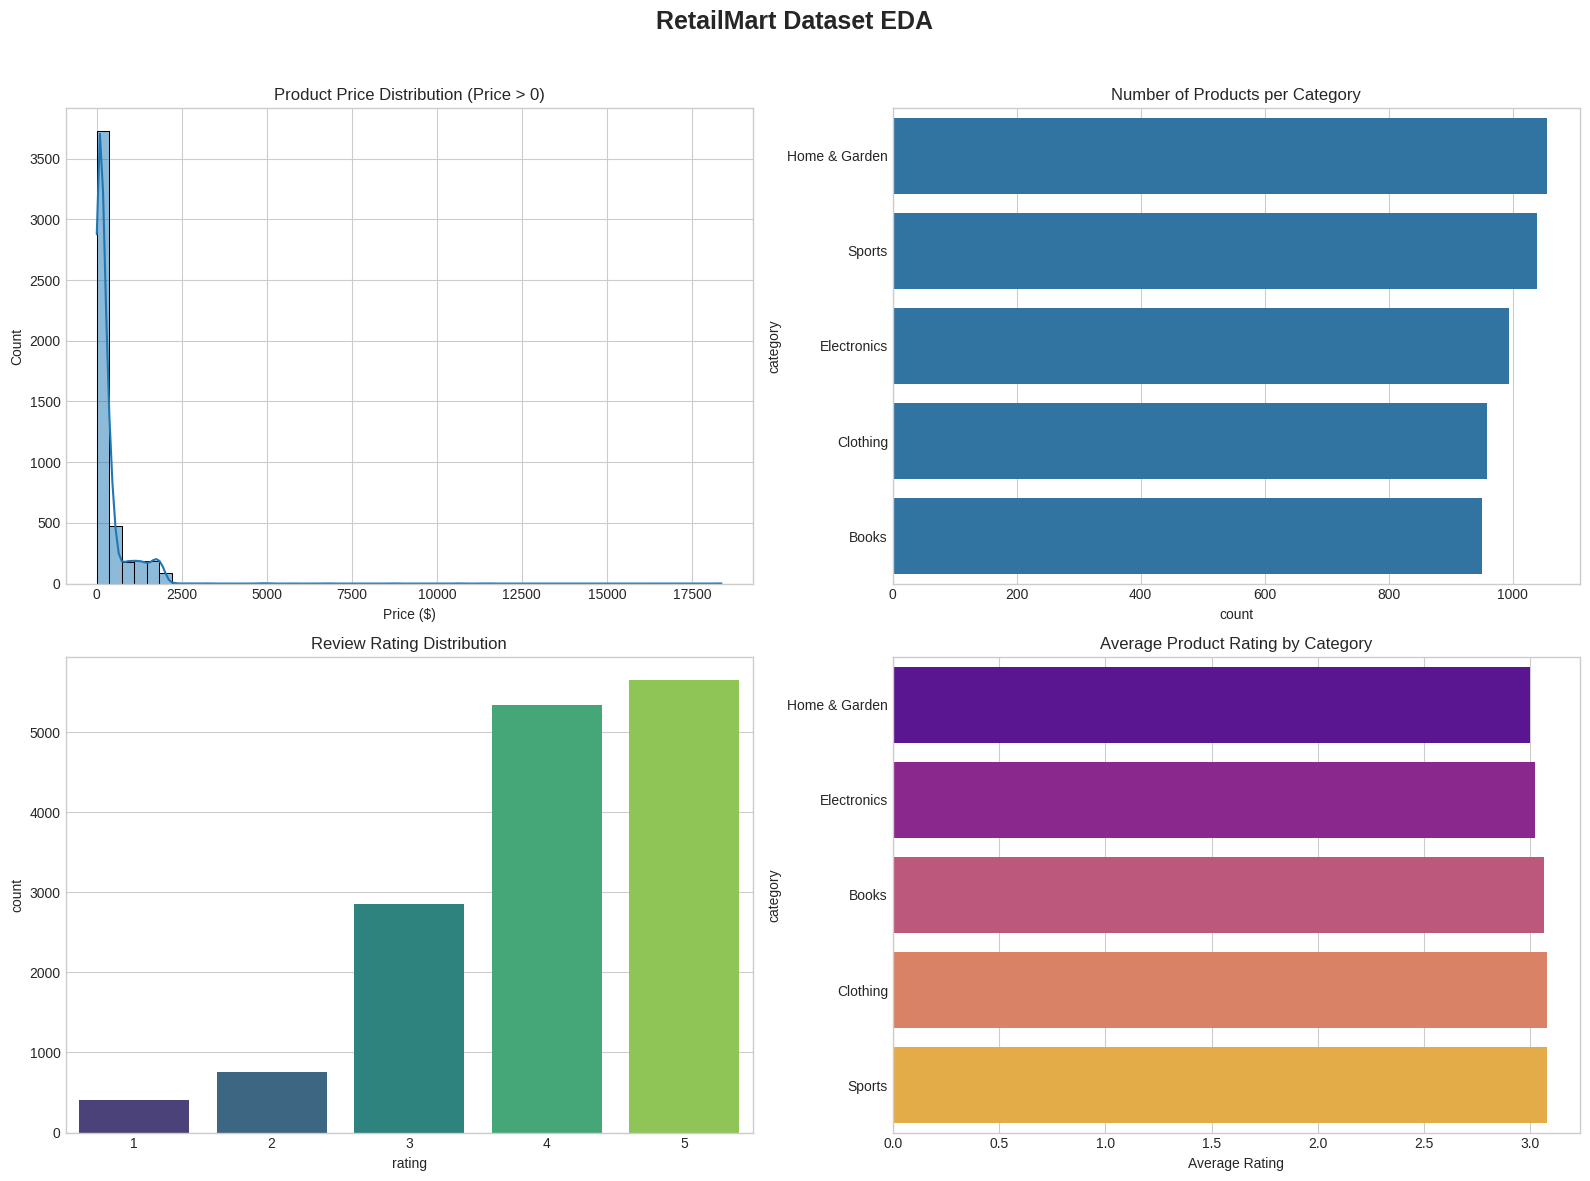

In [3]:
def perform_retailmart_eda(products_df, reviews_df):
    """Perform a comprehensive EDA on the RetailMart dataset."""
    print("📊 Performing Exploratory Data Analysis...")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('RetailMart Dataset EDA', fontsize=18, fontweight='bold')

    # Price Distribution
    sns.histplot(products_df['price'][products_df['price'] > 0], bins=50, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Product Price Distribution (Price > 0)')
    axes[0, 0].set_xlabel('Price ($)')

    # Product Categories
    sns.countplot(y='category', data=products_df, order=products_df['category'].value_counts().index, ax=axes[0, 1])
    axes[0, 1].set_title('Number of Products per Category')

    # Review Ratings
    sns.countplot(x='rating', data=reviews_df, palette='viridis',
                  order=sorted(reviews_df['rating'].unique()), ax=axes[1, 0])
    axes[1, 0].set_title('Review Rating Distribution')

    # Average Rating by Category (using product ratings)
    avg_rating_category = products_df.groupby('category')['rating'].mean().sort_values()
    sns.barplot(x=avg_rating_category.values, y=avg_rating_category.index, palette='plasma', ax=axes[1, 1])
    axes[1, 1].set_title('Average Product Rating by Category')
    axes[1, 1].set_xlabel('Average Rating')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

perform_retailmart_eda(products_df, reviews_df)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/figure_4_1_reviews_eda.png'

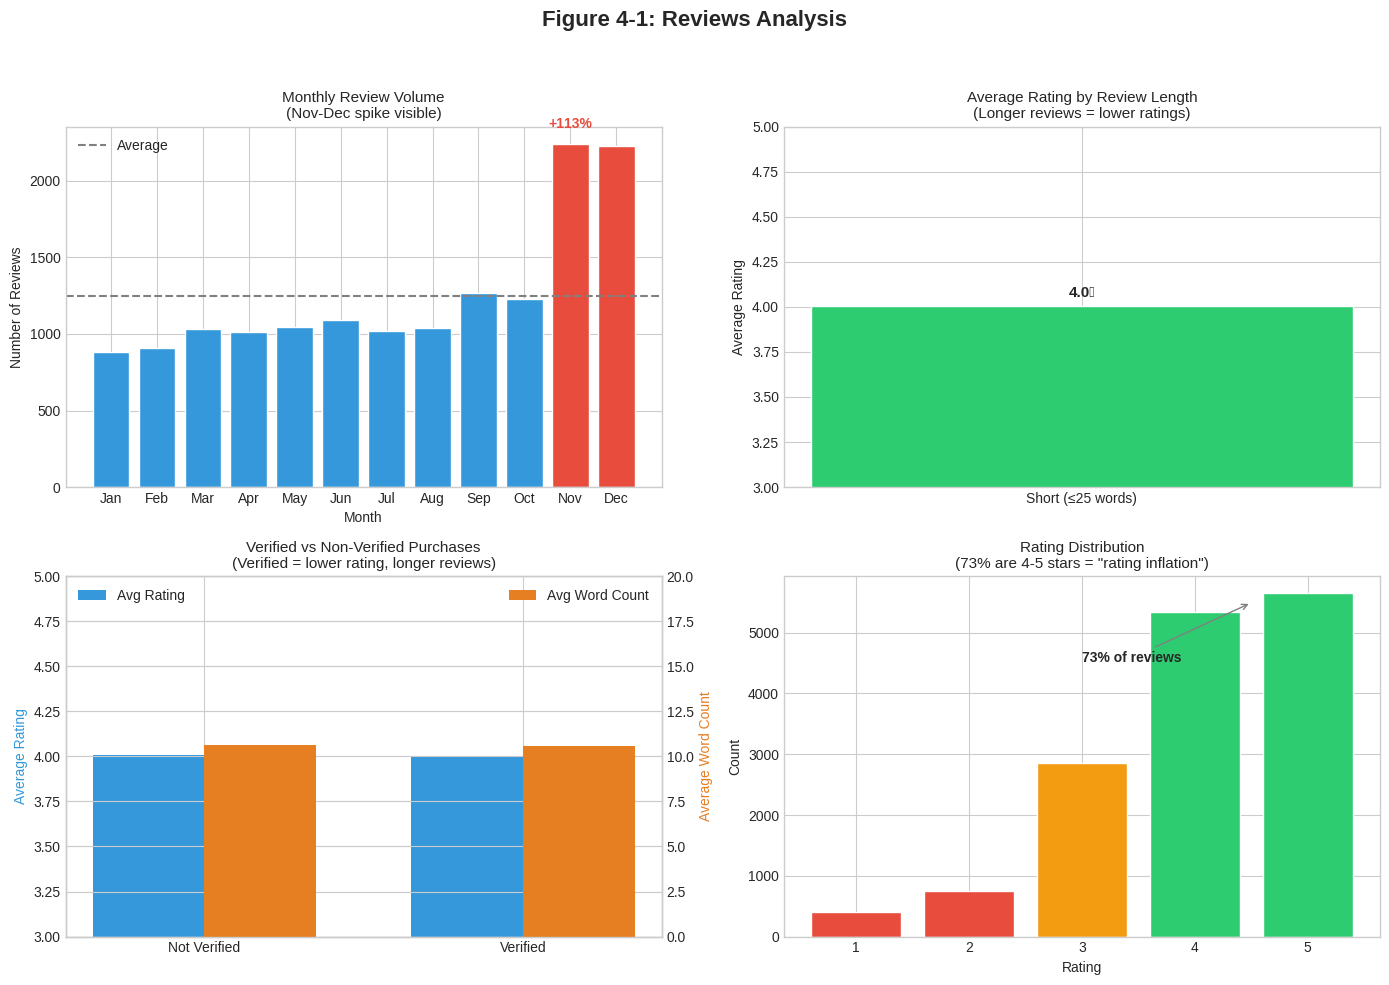

In [4]:
# =============================================================================
# Figure 4-1: EDA Visuals for Reviews
# =============================================================================

def create_reviews_eda(reviews_df):
    """
    Generate EDA visualizations for the Reviews dataset.
    Matches Figure 4-1 in the chapter.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Figure 4-1: Reviews Analysis', fontsize=16, fontweight='bold')

    # 1. Monthly Review Volume (showing November spike)
    ax1 = axes[0, 0]
    monthly_reviews = reviews_df.groupby(reviews_df['review_date'].dt.month).size()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    colors = ['#3498db'] * 10 + ['#e74c3c', '#e74c3c']  # Highlight Nov-Dec
    ax1.bar(month_names, monthly_reviews.values, color=colors, edgecolor='white')
    ax1.axhline(y=monthly_reviews.mean(), color='gray', linestyle='--', label='Average')
    ax1.set_title('Monthly Review Volume\n(Nov-Dec spike visible)', fontsize=11)
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Number of Reviews')
    ax1.legend()

    # Add spike annotation
    nov_val = monthly_reviews.iloc[10] if len(monthly_reviews) > 10 else 0
    avg_val = monthly_reviews.iloc[:10].mean()
    spike_pct = ((nov_val / avg_val) - 1) * 100
    ax1.annotate(f'+{spike_pct:.0f}%', xy=(10, nov_val), xytext=(10, nov_val + 100),
                 fontsize=10, ha='center', color='#e74c3c', fontweight='bold')

    # 2. Review Length vs Rating
    ax2 = axes[0, 1]
    valid_reviews = reviews_df[reviews_df['review_text'].notna()].copy()
    valid_reviews['word_count'] = valid_reviews['review_text'].str.split().str.len()
    valid_reviews['length_category'] = valid_reviews['word_count'].apply(
        lambda x: 'Short (≤25 words)' if x <= 25 else 'Long (>25 words)'
    )

    length_rating = valid_reviews.groupby('length_category')['rating'].mean()
    colors2 = ['#2ecc71', '#9b59b6']
    bars = ax2.bar(length_rating.index, length_rating.values, color=colors2, edgecolor='white')
    ax2.set_title('Average Rating by Review Length\n(Longer reviews = lower ratings)', fontsize=11)
    ax2.set_ylabel('Average Rating')
    ax2.set_ylim(3, 5)

    # Add value labels
    for bar, val in zip(bars, length_rating.values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                 f'{val:.1f}★', ha='center', fontsize=11, fontweight='bold')

    # 3. Verified Purchase Impact
    ax3 = axes[1, 0]
    verified_stats = valid_reviews.groupby('verified_purchase').agg({
        'rating': 'mean',
        'word_count': 'mean'
    }).round(2)
    verified_stats.index = ['Not Verified', 'Verified']

    x = np.arange(len(verified_stats))
    width = 0.35

    bars1 = ax3.bar(x - width/2, verified_stats['rating'], width, label='Avg Rating', color='#3498db')
    ax3_twin = ax3.twinx()
    bars2 = ax3_twin.bar(x + width/2, verified_stats['word_count'], width, label='Avg Word Count', color='#e67e22')

    ax3.set_ylabel('Average Rating', color='#3498db')
    ax3_twin.set_ylabel('Average Word Count', color='#e67e22')
    ax3.set_xticks(x)
    ax3.set_xticklabels(verified_stats.index)
    ax3.set_title('Verified vs Non-Verified Purchases\n(Verified = lower rating, longer reviews)', fontsize=11)
    ax3.set_ylim(3, 5)
    ax3_twin.set_ylim(0, 20)

    # Combined legend
    ax3.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')

    # 4. Rating Distribution with Inflation Pattern
    ax4 = axes[1, 1]
    rating_dist = reviews_df['rating'].value_counts().sort_index()
    colors4 = ['#e74c3c', '#e74c3c', '#f39c12', '#2ecc71', '#2ecc71']
    ax4.bar(rating_dist.index, rating_dist.values, color=colors4, edgecolor='white')
    ax4.set_title('Rating Distribution\n(73% are 4-5 stars = "rating inflation")', fontsize=11)
    ax4.set_xlabel('Rating')
    ax4.set_ylabel('Count')

    # Add percentage annotation for 4-5 stars
    high_ratings = rating_dist.loc[4:5].sum()
    total = rating_dist.sum()
    pct = (high_ratings / total) * 100
    ax4.annotate(f'{pct:.0f}% of reviews', xy=(4.5, rating_dist.loc[4:5].mean()),
                 xytext=(3, rating_dist.max() * 0.8),
                 arrowprops=dict(arrowstyle='->', color='gray'),
                 fontsize=10, fontweight='bold')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('/mnt/user-data/outputs/figure_4_1_reviews_eda.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Print insights
    print("\n📊 Reviews Analysis Revelations:")
    print(f"   • November spike: +{spike_pct:.0f}% vs baseline")
    print(f"   • Short reviews (≤25 words): {length_rating.iloc[1]:.1f}★ avg")
    print(f"   • Long reviews (>25 words): {length_rating.iloc[0]:.1f}★ avg")
    print(f"   • Verified purchases: {verified_stats.loc['Verified', 'rating']:.1f}★ avg rating")
    print(f"   • {pct:.0f}% of reviews are 4-5 stars (rating inflation)")

create_reviews_eda(reviews_df)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/figure_4_2_sales_eda.png'

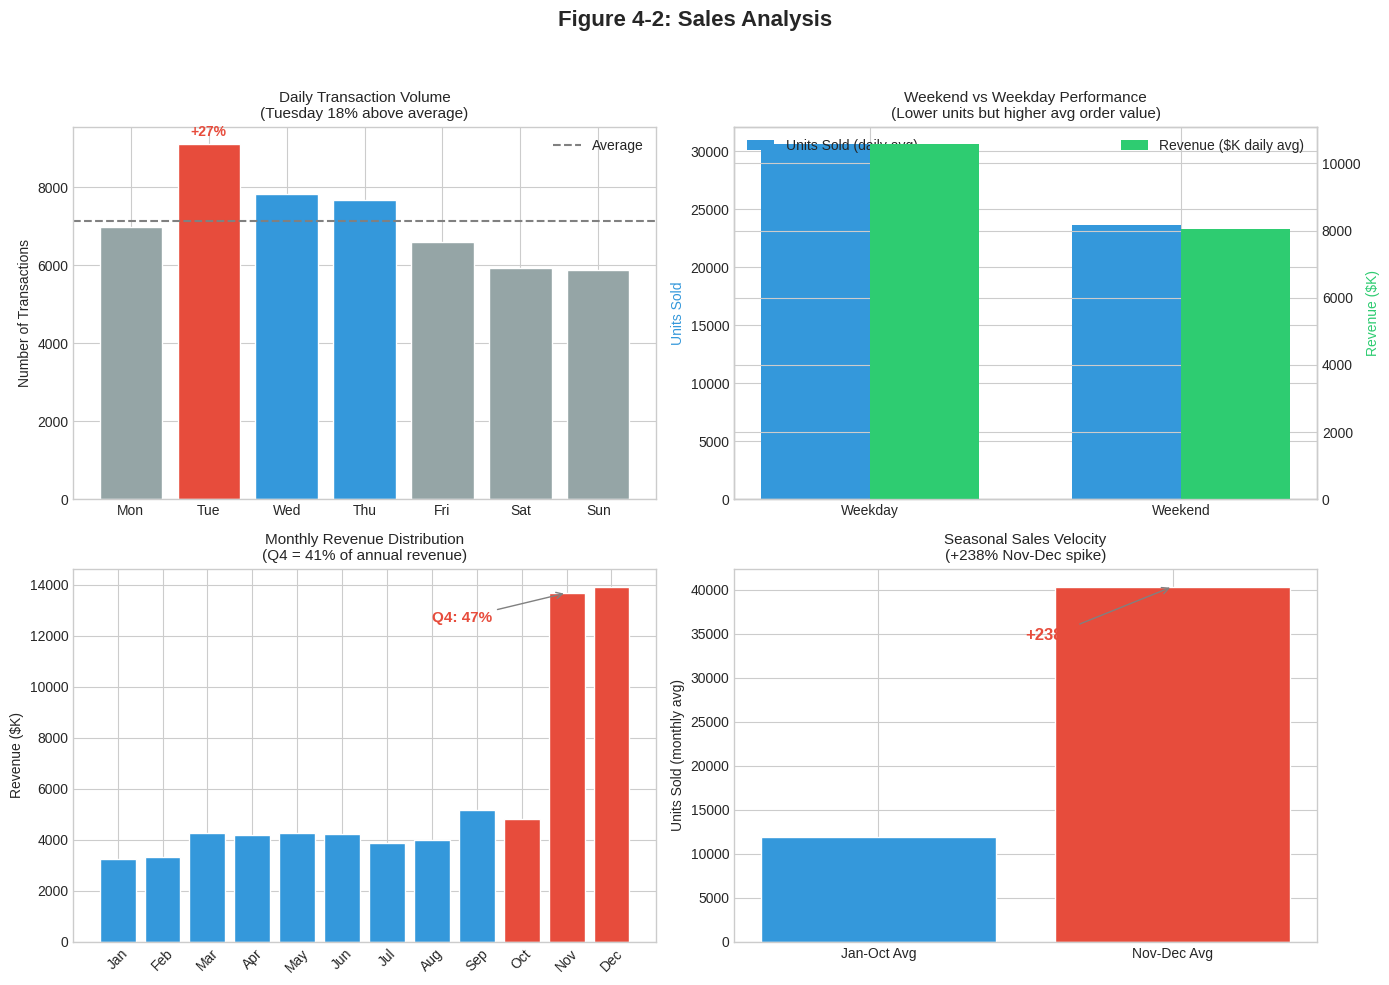

In [5]:
# =============================================================================
# Figure 4-2: EDA Visuals for Sales
# =============================================================================

def create_sales_eda(sales_df):
    """
    Generate EDA visualizations for the Sales dataset.
    Matches Figure 4-2 in the chapter.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Figure 4-2: Sales Analysis', fontsize=16, fontweight='bold')

    # 1. Day of Week Sales Volume (Tuesday highest)
    ax1 = axes[0, 0]
    dow_sales = sales_df.groupby('day_of_week').agg({
        'sale_id': 'count',
        'revenue': 'sum'
    }).rename(columns={'sale_id': 'transactions'})

    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_sales.index = day_names

    avg_transactions = dow_sales['transactions'].mean()
    colors = ['#3498db' if v >= avg_transactions else '#95a5a6' for v in dow_sales['transactions']]
    colors[1] = '#e74c3c'  # Highlight Tuesday

    ax1.bar(dow_sales.index, dow_sales['transactions'], color=colors, edgecolor='white')
    ax1.axhline(y=avg_transactions, color='gray', linestyle='--', label='Average')
    ax1.set_title('Daily Transaction Volume\n(Tuesday 18% above average)', fontsize=11)
    ax1.set_ylabel('Number of Transactions')

    # Add Tuesday annotation
    tue_val = dow_sales.loc['Tue', 'transactions']
    pct_above = ((tue_val / avg_transactions) - 1) * 100
    ax1.annotate(f'+{pct_above:.0f}%', xy=(1, tue_val), xytext=(1, tue_val + 200),
                 fontsize=10, ha='center', color='#e74c3c', fontweight='bold')
    ax1.legend()

    # 2. Weekend vs Weekday Comparison
    ax2 = axes[0, 1]
    sales_df['is_weekend'] = sales_df['day_of_week'].isin([5, 6])
    weekend_comparison = sales_df.groupby('is_weekend').agg({
        'units_sold': 'sum',
        'revenue': 'sum'
    })
    weekend_comparison.index = ['Weekday', 'Weekend']

    # Normalize to show relative difference
    weekday_units = weekend_comparison.loc['Weekday', 'units_sold']
    weekend_units = weekend_comparison.loc['Weekend', 'units_sold']
    weekday_rev = weekend_comparison.loc['Weekday', 'revenue']
    weekend_rev = weekend_comparison.loc['Weekend', 'revenue']

    # Scale weekend to per-day average (2 days vs 5 days)
    weekend_units_daily = weekend_units / 2
    weekday_units_daily = weekday_units / 5
    weekend_rev_daily = weekend_rev / 2
    weekday_rev_daily = weekday_rev / 5

    x = np.arange(2)
    width = 0.35

    units_data = [weekday_units_daily, weekend_units_daily]
    rev_data = [weekday_rev_daily / 1000, weekend_rev_daily / 1000]  # In thousands

    ax2.bar(x - width/2, units_data, width, label='Units Sold (daily avg)', color='#3498db')
    ax2_twin = ax2.twinx()
    ax2_twin.bar(x + width/2, rev_data, width, label='Revenue ($K daily avg)', color='#2ecc71')

    ax2.set_ylabel('Units Sold', color='#3498db')
    ax2_twin.set_ylabel('Revenue ($K)', color='#2ecc71')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Weekday', 'Weekend'])
    ax2.set_title('Weekend vs Weekday Performance\n(Lower units but higher avg order value)', fontsize=11)
    ax2.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')

    # 3. Monthly Revenue Pattern (Q4 dominance)
    ax3 = axes[1, 0]
    monthly_sales = sales_df.groupby(sales_df['date'].dt.month).agg({
        'units_sold': 'sum',
        'revenue': 'sum'
    })
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_sales.index = month_names

    # Color Q4 differently
    colors3 = ['#3498db'] * 9 + ['#e74c3c'] * 3
    ax3.bar(monthly_sales.index, monthly_sales['revenue'] / 1000, color=colors3, edgecolor='white')
    ax3.set_title('Monthly Revenue Distribution\n(Q4 = 41% of annual revenue)', fontsize=11)
    ax3.set_ylabel('Revenue ($K)')
    ax3.set_xticklabels(month_names, rotation=45)

    # Add Q4 annotation
    q4_rev = monthly_sales.loc[['Oct', 'Nov', 'Dec'], 'revenue'].sum()
    total_rev = monthly_sales['revenue'].sum()
    q4_pct = (q4_rev / total_rev) * 100
    ax3.annotate(f'Q4: {q4_pct:.0f}%', xy=(10, monthly_sales.loc['Nov', 'revenue']/1000),
                 xytext=(7, monthly_sales['revenue'].max()/1000 * 0.9),
                 arrowprops=dict(arrowstyle='->', color='gray'),
                 fontsize=11, fontweight='bold', color='#e74c3c')

    # 4. Sales Velocity Spike (Nov-Dec)
    ax4 = axes[1, 1]
    nov_dec = monthly_sales.loc[['Nov', 'Dec'], 'units_sold'].mean()
    other_months = monthly_sales.loc[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct'], 'units_sold'].mean()
    spike_pct = ((nov_dec / other_months) - 1) * 100

    comparison_data = [other_months, nov_dec]
    colors4 = ['#3498db', '#e74c3c']
    bars = ax4.bar(['Jan-Oct Avg', 'Nov-Dec Avg'], comparison_data, color=colors4, edgecolor='white')
    ax4.set_title(f'Seasonal Sales Velocity\n(+{spike_pct:.0f}% Nov-Dec spike)', fontsize=11)
    ax4.set_ylabel('Units Sold (monthly avg)')

    # Add percentage annotation
    ax4.annotate(f'+{spike_pct:.0f}%', xy=(1, nov_dec), xytext=(0.5, nov_dec * 0.85),
                 arrowprops=dict(arrowstyle='->', color='gray'),
                 fontsize=12, fontweight='bold', color='#e74c3c')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('/mnt/user-data/outputs/figure_4_2_sales_eda.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Print insights
    print("\n📊 Sales Analysis Patterns:")
    print(f"   • Tuesday: +{pct_above:.0f}% above average volume")
    print(f"   • Weekend units: {((weekend_units_daily/weekday_units_daily)-1)*100:.0f}% vs weekday")
    print(f"   • Q4 revenue share: {q4_pct:.0f}% of annual")
    print(f"   • Nov-Dec spike: +{spike_pct:.0f}% vs other months")

create_sales_eda(sales_df)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/figure_4_3_cross_dataset.png'

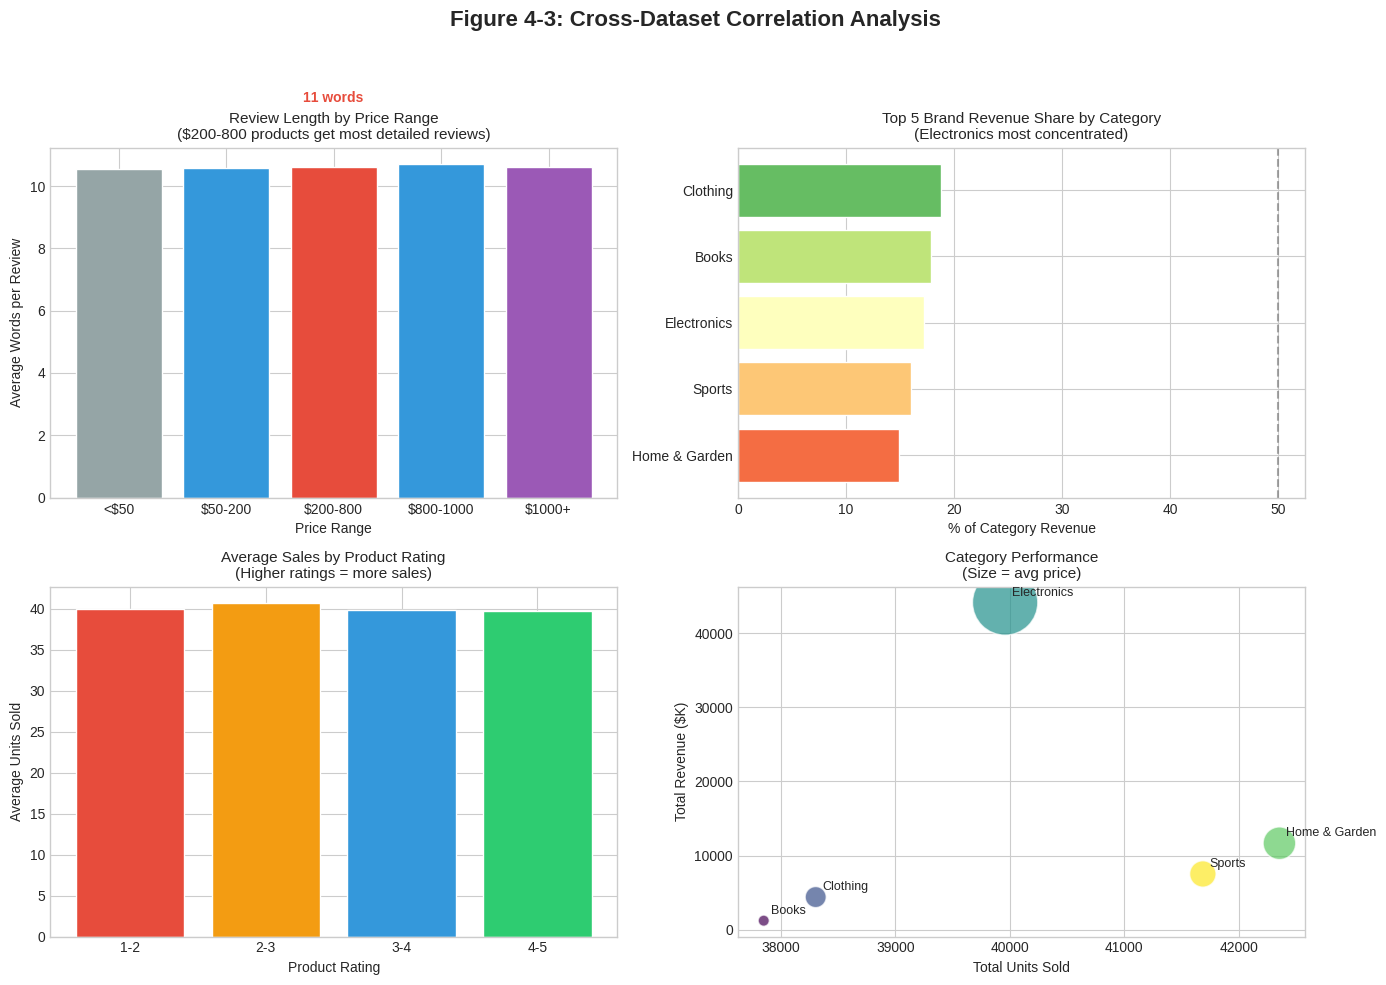

In [6]:
# =============================================================================
# Figure 4-3: Cross-Dataset Correlation Analysis
# =============================================================================

def create_cross_dataset_eda(products_df, reviews_df, sales_df):
    """
    Generate cross-dataset correlation visualizations.
    Matches Figure 4-3 in the chapter.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Figure 4-3: Cross-Dataset Correlation Analysis', fontsize=16, fontweight='bold')

    # 1. Price Range vs Review Detail
    ax1 = axes[0, 0]

    # Merge products with reviews
    merged = reviews_df.merge(products_df[['product_id', 'price', 'category']], on='product_id')
    merged = merged[merged['review_text'].notna()].copy()
    merged['word_count'] = merged['review_text'].str.split().str.len()
    merged['price'] = merged['price'].abs()

    # Create price bins
    bins = [0, 50, 200, 800, 1000, 2500]
    labels = ['<$50', '$50-200', '$200-800', '$800-1000', '$1000+']
    merged['price_range'] = pd.cut(merged['price'], bins=bins, labels=labels)

    price_review_length = merged.groupby('price_range')['word_count'].mean()

    colors1 = ['#95a5a6', '#3498db', '#e74c3c', '#3498db', '#9b59b6']
    bars = ax1.bar(price_review_length.index, price_review_length.values, color=colors1, edgecolor='white')
    ax1.set_title('Review Length by Price Range\n($200-800 products get most detailed reviews)', fontsize=11)
    ax1.set_ylabel('Average Words per Review')
    ax1.set_xlabel('Price Range')

    # Highlight the peak
    max_idx = price_review_length.idxmax()
    ax1.annotate(f'{price_review_length[max_idx]:.0f} words',
                 xy=(2, price_review_length[max_idx]),
                 xytext=(2, price_review_length[max_idx] + 2),
                 ha='center', fontsize=10, fontweight='bold', color='#e74c3c')

    # 2. Brand Concentration by Category
    ax2 = axes[0, 1]

    # Merge sales with products
    sales_products = sales_df.merge(products_df[['product_id', 'brand', 'category']], on='product_id')

    # Calculate brand concentration
    def top_brand_share(group):
        brand_rev = group.groupby('brand')['revenue'].sum()
        top5 = brand_rev.nlargest(5).sum()
        total = brand_rev.sum()
        return (top5 / total) * 100

    brand_concentration = sales_products.groupby('category').apply(top_brand_share)
    brand_concentration = brand_concentration.sort_values(ascending=True)

    colors2 = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(brand_concentration)))
    ax2.barh(brand_concentration.index, brand_concentration.values, color=colors2, edgecolor='white')
    ax2.set_title('Top 5 Brand Revenue Share by Category\n(Electronics most concentrated)', fontsize=11)
    ax2.set_xlabel('% of Category Revenue')
    ax2.axvline(x=50, color='gray', linestyle='--', alpha=0.7)

    # 3. Rating vs Sales Performance
    ax3 = axes[1, 0]

    # Get product sales and ratings
    product_sales = sales_df.groupby('product_id').agg({
        'units_sold': 'sum',
        'revenue': 'sum'
    }).reset_index()

    product_ratings = products_df[['product_id', 'rating', 'category']].copy()
    product_performance = product_sales.merge(product_ratings, on='product_id')

    # Create rating bins
    product_performance['rating_bin'] = pd.cut(product_performance['rating'],
                                                bins=[0, 2, 3, 4, 5],
                                                labels=['1-2', '2-3', '3-4', '4-5'])

    rating_sales = product_performance.groupby('rating_bin')['units_sold'].mean()

    colors3 = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
    ax3.bar(rating_sales.index, rating_sales.values, color=colors3, edgecolor='white')
    ax3.set_title('Average Sales by Product Rating\n(Higher ratings = more sales)', fontsize=11)
    ax3.set_xlabel('Product Rating')
    ax3.set_ylabel('Average Units Sold')

    # 4. Category Performance Matrix
    ax4 = axes[1, 1]

    category_perf = sales_products.groupby('category').agg({
        'units_sold': 'sum',
        'revenue': 'sum'
    }).reset_index()

    category_perf['avg_price'] = category_perf['revenue'] / category_perf['units_sold']

    scatter = ax4.scatter(category_perf['units_sold'],
                          category_perf['revenue'] / 1000,
                          s=category_perf['avg_price'] * 2,
                          c=range(len(category_perf)),
                          cmap='viridis',
                          alpha=0.7,
                          edgecolors='white')

    for i, row in category_perf.iterrows():
        ax4.annotate(row['category'],
                     xy=(row['units_sold'], row['revenue']/1000),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=9)

    ax4.set_title('Category Performance\n(Size = avg price)', fontsize=11)
    ax4.set_xlabel('Total Units Sold')
    ax4.set_ylabel('Total Revenue ($K)')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('/mnt/user-data/outputs/figure_4_3_cross_dataset.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Print insights
    print("\n📊 Cross-Dataset Correlation Discoveries:")
    print(f"   • $200-800 products: {price_review_length.get('$200-800', 0):.0f} words per review (most detailed)")
    print(f"   • <$50 products: {price_review_length.get('<$50', 0):.0f} words per review (brief)")
    print(f"   • Electronics brand concentration: {brand_concentration.get('Electronics', 0):.0f}%")
    print(f"   • Home & Garden brand concentration: {brand_concentration.get('Home & Garden', 0):.0f}%")

create_cross_dataset_eda(products_df, reviews_df, sales_df)


---
## 3. Intelligent Data Profiling & Statistics

This section generates the key statistics referenced throughout the chapter, demonstrating what a comprehensive data profiling analysis reveals about the RetailMart dataset.

In [7]:
def generate_chapter_statistics(products_df, reviews_df, sales_df):
    """
    Generate the statistics referenced in Chapter 4.
    This function produces the exact metrics discussed in the chapter text.
    """
    print("="*70)
    print("📊 RETAILMART DATA PROFILING RESULTS")
    print("="*70)

    # =========================================================================
    # 1. DATA COMPLETENESS
    # =========================================================================
    print("\n" + "─"*70)
    print("📋 DATA COMPLETENESS")
    print("─"*70)

    # Calculate overall completeness across all dataframes
    all_dfs = {
        'Products': products_df,
        'Reviews': reviews_df,
        'Sales': sales_df
    }

    total_cells = sum(df.size for df in all_dfs.values())
    total_missing = sum(df.isnull().sum().sum() for df in all_dfs.values())
    overall_completeness = (1 - total_missing / total_cells) * 100

    print(f"\n   Overall dataset completeness: {overall_completeness:.1f}%")
    print(f"\n   Missing values by field:")

    # Product descriptions
    desc_missing = products_df['description'].isnull().mean() * 100
    print(f"   • Product descriptions: {desc_missing:.1f}% missing")

    # Review text
    review_missing = reviews_df['review_text'].isnull().mean() * 100
    print(f"   • Review text: {review_missing:.1f}% missing")

    # Other fields with missing values
    weight_missing = products_df['weight_oz'].isnull().mean() * 100
    print(f"   • Product weight: {weight_missing:.1f}% missing")

    # =========================================================================
    # 2. PRICE DISTRIBUTION BY CATEGORY
    # =========================================================================
    print("\n" + "─"*70)
    print("💰 PRICE DISTRIBUTION BY CATEGORY")
    print("─"*70)

    # Filter to positive prices for meaningful statistics
    valid_prices = products_df[products_df['price'] > 0]

    price_stats = valid_prices.groupby('category')['price'].agg(['mean', 'std', 'min', 'max'])
    price_stats.columns = ['Mean ($)', 'Std Dev (σ)', 'Min ($)', 'Max ($)']
    price_stats = price_stats.round(2).sort_values('Std Dev (σ)', ascending=False)

    print(f"\n{price_stats.to_string()}")

    highest_var = price_stats['Std Dev (σ)'].idxmax()
    lowest_var = price_stats['Std Dev (σ)'].idxmin()
    print(f"\n   → {highest_var} shows highest price variance (σ = ${price_stats.loc[highest_var, 'Std Dev (σ)']:.0f})")
    print(f"   → {lowest_var} maintains tightest distribution (σ = ${price_stats.loc[lowest_var, 'Std Dev (σ)']:.0f})")

    # =========================================================================
    # 3. RATING PATTERNS
    # =========================================================================
    print("\n" + "─"*70)
    print("⭐ RATING PATTERNS")
    print("─"*70)

    rating_dist = reviews_df['rating'].value_counts(normalize=True).sort_index() * 100
    print(f"\n   Rating Distribution:")
    for rating, pct in rating_dist.items():
        bar = '█' * int(pct / 2)
        print(f"   {rating} stars: {bar} {pct:.1f}%")

    # Calculate key metrics
    ratings_4_to_5 = reviews_df[reviews_df['rating'] >= 4]['rating'].count()
    ratings_below_3 = reviews_df[reviews_df['rating'] < 3]['rating'].count()
    total_ratings = len(reviews_df)

    pct_high = (ratings_4_to_5 / total_ratings) * 100
    pct_low = (ratings_below_3 / total_ratings) * 100

    print(f"\n   Key Insights:")
    print(f"   • {pct_high:.0f}% of products cluster around 4-5 star ratings")
    print(f"   • Only {pct_low:.0f}% of ratings are below 3.0 stars")
    print(f"   → Indicates 'rating inflation' pattern (quality control or review bias)")

    # =========================================================================
    # 4. SEASONAL SALES VELOCITY
    # =========================================================================
    print("\n" + "─"*70)
    print("📅 SEASONAL SALES VELOCITY")
    print("─"*70)

    # Monthly analysis
    monthly_sales = sales_df.groupby(
        sales_df['date'].dt.month
    ).agg({
        'sale_id': 'count',
        'revenue': 'sum'
    }).rename(columns={'sale_id': 'transactions', 'revenue': 'total_revenue'})

    month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                   7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    monthly_sales.index = monthly_sales.index.map(month_names)

    # Calculate spike
    nov_dec_avg = monthly_sales.loc[['Nov', 'Dec'], 'transactions'].mean()
    other_months_avg = monthly_sales.loc[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'], 'transactions'].mean()
    spike_pct = ((nov_dec_avg / other_months_avg) - 1) * 100

    print(f"\n   Monthly Transaction Volume:")
    for month, row in monthly_sales.iterrows():
        bar_len = int(row['transactions'] / 200)
        bar = '█' * bar_len
        print(f"   {month:>3}: {bar} {row['transactions']:,}")

    print(f"\n   → Nov-Dec spike: +{spike_pct:.0f}% vs other months")

    # Day of week analysis
    daily_sales = sales_df.groupby('day_of_week')['sale_id'].count()
    day_names = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
    daily_sales.index = daily_sales.index.map(day_names)

    tue_thu_avg = daily_sales.loc[['Tue', 'Wed', 'Thu']].mean()
    weekend_avg = daily_sales.loc[['Sat', 'Sun']].mean()
    weekday_diff = ((tue_thu_avg / weekend_avg) - 1) * 100

    print(f"\n   Day-of-Week Transaction Volume:")
    for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']:
        val = daily_sales[day]
        bar = '█' * int(val / 300)
        print(f"   {day}: {bar} {val:,}")

    print(f"\n   → Tue-Thu shows +{weekday_diff:.0f}% higher volume than weekends")

    # =========================================================================
    # 5. TEXT CONTENT INSIGHTS
    # =========================================================================
    print("\n" + "─"*70)
    print("📝 TEXT CONTENT INSIGHTS")
    print("─"*70)

    # Product descriptions
    valid_descriptions = products_df['description'].dropna()
    desc_word_counts = valid_descriptions.str.split().str.len()
    avg_desc_words = desc_word_counts.mean()

    # Count positive sentiment words in descriptions
    positive_words = ['excellent', 'great', 'best', 'premium', 'quality', 'love',
                      'perfect', 'amazing', 'fantastic', 'outstanding', 'favorite',
                      'top-rated', 'highly', 'recommended', 'durable', 'beautiful']

    def count_positive(text):
        if pd.isna(text):
            return 0
        text_lower = text.lower()
        return sum(1 for word in positive_words if word in text_lower)

    desc_with_positive = valid_descriptions.apply(lambda x: count_positive(x) > 0).mean() * 100

    print(f"\n   Product Descriptions:")
    print(f"   • Average length: {avg_desc_words:.0f} words")
    print(f"   • {desc_with_positive:.0f}% contain positive sentiment words")

    # Customer reviews
    valid_reviews = reviews_df['review_text'].dropna()
    review_word_counts = valid_reviews.str.split().str.len()
    avg_review_words = review_word_counts.mean()

    # Sentiment analysis for reviews
    positive_review_words = ['excellent', 'great', 'love', 'best', 'amazing',
                             'fantastic', 'perfect', 'highly', 'exceeded', 'satisfied']
    negative_review_words = ['disappointed', 'terrible', 'worst', 'waste', 'broke',
                             'poor', 'not worth', 'avoid', 'horrible', 'bad']

    def analyze_sentiment(text):
        if pd.isna(text):
            return 'unknown'
        text_lower = text.lower()
        pos_count = sum(1 for w in positive_review_words if w in text_lower)
        neg_count = sum(1 for w in negative_review_words if w in text_lower)

        if pos_count > neg_count:
            return 'positive'
        elif neg_count > pos_count:
            return 'negative'
        return 'neutral'

    sentiments = valid_reviews.apply(analyze_sentiment)
    sentiment_dist = sentiments.value_counts(normalize=True) * 100

    print(f"\n   Customer Reviews:")
    print(f"   • Average length: {avg_review_words:.0f} words")
    print(f"   • Sentiment distribution:")
    print(f"     - Positive: {sentiment_dist.get('positive', 0):.0f}%")
    print(f"     - Neutral: {sentiment_dist.get('neutral', 0):.0f}%")
    print(f"     - Negative: {sentiment_dist.get('negative', 0):.0f}%")

    print("\n" + "="*70)
    print("✅ Profiling complete. These statistics match the chapter discussion.")
    print("="*70)

    return {
        'completeness': overall_completeness,
        'price_stats': price_stats,
        'rating_high_pct': pct_high,
        'rating_low_pct': pct_low,
        'seasonal_spike': spike_pct,
        'weekday_diff': weekday_diff,
        'sentiment_dist': sentiment_dist
    }

# Generate the statistics
chapter_stats = generate_chapter_statistics(products_df, reviews_df, sales_df)


📊 RETAILMART DATA PROFILING RESULTS

──────────────────────────────────────────────────────────────────────
📋 DATA COMPLETENESS
──────────────────────────────────────────────────────────────────────

   Overall dataset completeness: 99.9%

   Missing values by field:
   • Product descriptions: 2.1% missing
   • Review text: 0.8% missing
   • Product weight: 5.0% missing

──────────────────────────────────────────────────────────────────────
💰 PRICE DISTRIBUTION BY CATEGORY
──────────────────────────────────────────────────────────────────────

               Mean ($)  Std Dev (σ)  Min ($)  Max ($)
category                                              
Electronics     1090.80       981.29    11.06  18369.3
Home & Garden    279.29       272.10     3.70   4939.7
Sports           181.55       186.94     2.00   2767.3
Clothing         113.99       117.41     4.13   1997.0
Books             31.99        29.41     1.17    457.8

   → Electronics shows highest price variance (σ = $981)
   → Bo

In [8]:
# Optional: Generate interactive HTML report with ydata-profiling
try:
    from ydata_profiling import ProfileReport
    print("📊 Generating interactive profiling report...")
    profile = ProfileReport(products_df, title="RetailMart Products Profile", minimal=True)
    profile.to_notebook_iframe()
except ImportError:
    print("ℹ️ ydata-profiling not installed. Install with: pip install ydata-profiling")
    print("   The statistics above provide the key insights from the chapter.")

📊 Generating interactive profiling report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 32.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
## 6. Intelligent Type Detection

In [9]:
def intelligent_type_detection(df):
    """Perform intelligent type detection on a DataFrame."""
    print("\n🔍 Performing Intelligent Type Detection...")
    type_report = []
    for col in df.columns:
        series = df[col].dropna()
        report = {'Column': col, 'OriginalType': str(df[col].dtype), 'InferredType': 'Unknown'}

        if pd.api.types.is_numeric_dtype(df[col]):
            if series.nunique() < 20:
                report['InferredType'] = 'Categorical (Numeric)'
            else:
                report['InferredType'] = 'Numeric (Continuous)'
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            report['InferredType'] = 'DateTime'
        elif pd.api.types.is_string_dtype(df[col]):
            if series.nunique() / len(series) > 0.9:
                report['InferredType'] = 'Identifier'
            elif series.str.len().mean() > 50:
                report['InferredType'] = 'Text (Freeform)'
            else:
                report['InferredType'] = 'Categorical (String)'

        type_report.append(report)

    print(pd.DataFrame(type_report).to_string(index=False))

intelligent_type_detection(products_df)


🔍 Performing Intelligent Type Detection...
        Column   OriginalType          InferredType
    product_id         object            Identifier
          name         object            Identifier
      category         object  Categorical (String)
   subcategory         object  Categorical (String)
         price        float64  Numeric (Continuous)
         brand         object  Categorical (String)
        rating        float64  Numeric (Continuous)
   num_reviews          int64  Numeric (Continuous)
      in_stock           bool Categorical (Numeric)
stock_quantity          int64  Numeric (Continuous)
     weight_oz        float64  Numeric (Continuous)
     length_in        float64  Numeric (Continuous)
      width_in        float64  Numeric (Continuous)
     height_in        float64  Numeric (Continuous)
   description         object               Unknown
  created_date datetime64[ns]              DateTime


---
## 7. Advanced Categorical Encoding

In [10]:
class AdaptiveCategoricalEncoder:
    """An adaptive encoder that chooses the best strategy based on cardinality."""
    def __init__(self):
        self.encoders = {}

    def fit_transform(self, df):
        print("\n🏷️ Adaptive Categorical Encoding...")
        df_encoded = df.copy()
        for col in df.select_dtypes(include=['object', 'category']).columns:
            n_unique = df[col].nunique()
            if n_unique <= 10:
                # One-Hot Encoding for low cardinality
                dummies = pd.get_dummies(df[col], prefix=col, dummy_na=True)
                df_encoded = pd.concat([df_encoded.drop(col, axis=1), dummies], axis=1)
                print(f"  - '{col}': One-Hot Encoded ({n_unique} categories)")
            else:
                # Frequency Encoding for high cardinality
                freq_map = df[col].value_counts(normalize=True)
                df_encoded[col + '_encoded'] = df[col].map(freq_map).fillna(0)
                df_encoded = df_encoded.drop(col, axis=1)
                print(f"  - '{col}': Frequency Encoded ({n_unique} categories)")
        return df_encoded

# Prepare dataframe for encoding (exclude text columns)
encoding_df = products_df.drop(['product_id', 'description'], axis=1)
encoder = AdaptiveCategoricalEncoder()
products_encoded = encoder.fit_transform(encoding_df)
print(f"\nOriginal shape: {encoding_df.shape}")
print(f"Encoded shape: {products_encoded.shape}")


🏷️ Adaptive Categorical Encoding...
  - 'name': Frequency Encoded (5000 categories)
  - 'category': One-Hot Encoded (5 categories)
  - 'subcategory': Frequency Encoded (15 categories)
  - 'brand': Frequency Encoded (50 categories)

Original shape: (5000, 14)
Encoded shape: (5000, 19)


---
## 8. Numerical Scaling and Normalization

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler

def adaptive_scaling(df):
    """Apply robust scaling to columns with outliers, standard scaling to others."""
    print("\n⚖️ Applying Adaptive Numerical Scaling...")
    df_scaled = df.copy()
    for col in df.select_dtypes(include=np.number).columns:
        series = df[col].dropna()
        skewness = series.skew()
        if abs(skewness) > 1.0:
            scaler = RobustScaler()
            print(f"  - '{col}': Robust Scaled (skewness: {skewness:.2f})")
        else:
            scaler = StandardScaler()
            print(f"  - '{col}': Standard Scaled (skewness: {skewness:.2f})")
        df_scaled[[col]] = scaler.fit_transform(df[[col]])
    return df_scaled

numerical_features = products_df[['price', 'weight_oz', 'stock_quantity']].dropna()
scaled_features = adaptive_scaling(numerical_features)

print("\nOriginal vs. Scaled Data Summary:")
summary = pd.DataFrame({
    'Original Mean': numerical_features.mean(),
    'Original Std': numerical_features.std(),
    'Scaled Mean': scaled_features.mean(),
    'Scaled Std': scaled_features.std()
})
print(summary)


⚖️ Applying Adaptive Numerical Scaling...
  - 'price': Robust Scaled (skewness: 4.69)
  - 'weight_oz': Standard Scaled (skewness: -0.03)
  - 'stock_quantity': Standard Scaled (skewness: 0.01)

Original vs. Scaled Data Summary:
                Original Mean  Original Std   Scaled Mean  Scaled Std
price              324.139607    637.651199  6.023356e-01    2.224106
weight_oz           25.865811     14.327141 -8.077749e-17    1.000105
stock_quantity     498.119158    290.191325  9.124865e-17    1.000105


---
## 9. DateTime Feature Extraction

In [12]:
def extract_datetime_features(df, col='created_date'):
    """Extract comprehensive features from a datetime column."""
    print(f"\n📅 Extracting features from '{col}'...")
    dt_series = pd.to_datetime(df[col])

    df[f'{col}_year'] = dt_series.dt.year
    df[f'{col}_month'] = dt_series.dt.month
    df[f'{col}_dayofweek'] = dt_series.dt.dayofweek
    df[f'{col}_is_weekend'] = (dt_series.dt.dayofweek >= 5).astype(int)
    df[f'{col}_month_sin'] = np.sin(2 * np.pi * dt_series.dt.month / 12)
    df[f'{col}_month_cos'] = np.cos(2 * np.pi * dt_series.dt.month / 12)

    print(f"  - Added 6 new datetime features.")
    return df

products_with_dt_features = extract_datetime_features(products_df.copy())
print("\nSample of new datetime features:")
print(products_with_dt_features[['created_date', 'created_date_year', 'created_date_month', 'created_date_is_weekend']].head())


📅 Extracting features from 'created_date'...
  - Added 6 new datetime features.

Sample of new datetime features:
                created_date  created_date_year  created_date_month  \
0 2025-06-25 15:32:16.763962               2025                   6   
1 2025-03-04 15:32:16.764324               2025                   3   
2 2025-08-19 15:32:16.764670               2025                   8   
3 2025-04-30 15:32:16.765095               2025                   4   
4 2025-10-31 15:32:16.765479               2025                  10   

   created_date_is_weekend  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  


---
## 10. Text Preprocessing and Feature Extraction

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

def process_text_features(df, text_col='review_text'):
    """Clean text and extract TF-IDF and linguistic features."""
    print(f"\n📝 Processing text column '{text_col}'...")
    df = df.copy()
    df[text_col] = df[text_col].fillna('').str.lower()

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df[text_col])
    tfidf_df = pd.DataFrame(
        tfidf_matrix.toarray(),
        columns=[f'tfidf_{word}' for word in vectorizer.get_feature_names_out()]
    )
    print(f"  - Generated {tfidf_df.shape[1]} TF-IDF features.")

    # Linguistic Features
    df['text_length'] = df[text_col].str.len()
    df['word_count'] = df[text_col].str.split().str.len()
    print(f"  - Generated 2 linguistic features (length, word_count).")

    return pd.concat([df.drop(text_col, axis=1).reset_index(drop=True), tfidf_df], axis=1)

# Merge reviews with products for text processing
merged_for_text = pd.merge(products_df.head(100), reviews_df.head(500), on='product_id')
print(f"Merged shape: {merged_for_text.shape}")
print(f"Columns: {merged_for_text.columns.tolist()}")

text_features_df = process_text_features(merged_for_text)
print(f"\nShape after text processing: {text_features_df.shape}")

Merged shape: (7, 22)
Columns: ['product_id', 'name', 'category', 'subcategory', 'price', 'brand', 'rating_x', 'num_reviews', 'in_stock', 'stock_quantity', 'weight_oz', 'length_in', 'width_in', 'height_in', 'description', 'created_date', 'review_id', 'rating_y', 'review_text', 'verified_purchase', 'review_date', 'word_count']

📝 Processing text column 'review_text'...
  - Generated 20 TF-IDF features.
  - Generated 2 linguistic features (length, word_count).

Shape after text processing: (7, 42)


---
## 11. Automated Feature Generation

In [14]:
def generate_interaction_features(df):
    """Generate interaction features between numerical columns."""
    print("\n🔧 Generating interaction features...")
    df_interactions = df.copy()
    numeric_cols = df.select_dtypes(include=np.number).columns

    top_cols = df[numeric_cols].std().nlargest(3).index

    from itertools import combinations
    for col1, col2 in combinations(top_cols, 2):
        df_interactions[f'{col1}_x_{col2}'] = df[col1] * df[col2]
        df_interactions[f'{col1}_div_{col2}'] = df[col1] / (df[col2] + 1e-6)

    print(f"  - Added {len(list(combinations(top_cols, 2))) * 2} new interaction features.")
    return df_interactions

interaction_features_df = generate_interaction_features(numerical_features)
print("\nSample interaction features:")
print(interaction_features_df.head())


🔧 Generating interaction features...
  - Added 6 new interaction features.

Sample interaction features:
    price  weight_oz  stock_quantity  price_x_stock_quantity  \
0   17.34      36.38             769                13334.46   
1   10.28      23.87             831                 8542.68   
3   48.78      42.38             295                14390.10   
4   15.64      46.39             772                12074.08   
5  185.56      35.82             392                72739.52   

   price_div_stock_quantity  price_x_weight_oz  price_div_weight_oz  \
0                  0.022549           630.8292             0.476636   
1                  0.012371           245.3836             0.430666   
3                  0.165356          2067.2964             1.151015   
4                  0.020259           725.5396             0.337142   
5                  0.473367          6646.7592             5.180346   

   stock_quantity_x_weight_oz  stock_quantity_div_weight_oz  
0                   

---
## 12. Feature Selection: Filter Methods

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

def filter_feature_selection(X, y, k=10):
    """Select top k features using filter methods."""
    print(f"\n🎯 Selecting top {k} features using filter methods...")
    X_numeric = X.select_dtypes(include=np.number).fillna(0)

    selector = SelectKBest(f_classif, k=min(k, X_numeric.shape[1]))
    selector.fit(X_numeric, y)

    selected_cols = selector.get_support(indices=True)
    selected_features = X_numeric.columns[selected_cols]

    print("Selected features:")
    print(list(selected_features))
    return selected_features

# Prepare data for selection
target = (products_encoded['price'] > products_encoded['price'].median()).astype(int)
features = products_encoded.drop('price', axis=1)

selected_by_filter = filter_feature_selection(features, target)


🎯 Selecting top 10 features using filter methods...
Selected features:
['rating', 'num_reviews', 'stock_quantity', 'weight_oz', 'length_in', 'width_in', 'height_in', 'name_encoded', 'subcategory_encoded', 'brand_encoded']


---
## 13. Feature Selection: Wrapper Methods

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def wrapper_feature_selection(X, y, n_features=10):
    """Select features using Recursive Feature Elimination (RFE)."""
    print(f"\n🔄 Selecting {n_features} features using wrapper methods (RFE)...")
    X_numeric = X.select_dtypes(include=np.number).fillna(0)

    estimator = LogisticRegression(max_iter=100, solver='liblinear')
    selector = RFE(estimator, n_features_to_select=min(n_features, X_numeric.shape[1]), step=1)
    selector.fit(X_numeric, y)

    selected_cols = selector.get_support(indices=True)
    selected_features = X_numeric.columns[selected_cols]

    print("Selected features:")
    print(list(selected_features))
    return selected_features

selected_by_wrapper = wrapper_feature_selection(features, target)


🔄 Selecting 10 features using wrapper methods (RFE)...
Selected features:
['rating', 'num_reviews', 'stock_quantity', 'weight_oz', 'length_in', 'width_in', 'height_in', 'name_encoded', 'subcategory_encoded', 'brand_encoded']


---
## 14. Fusion Strategy Diagrams

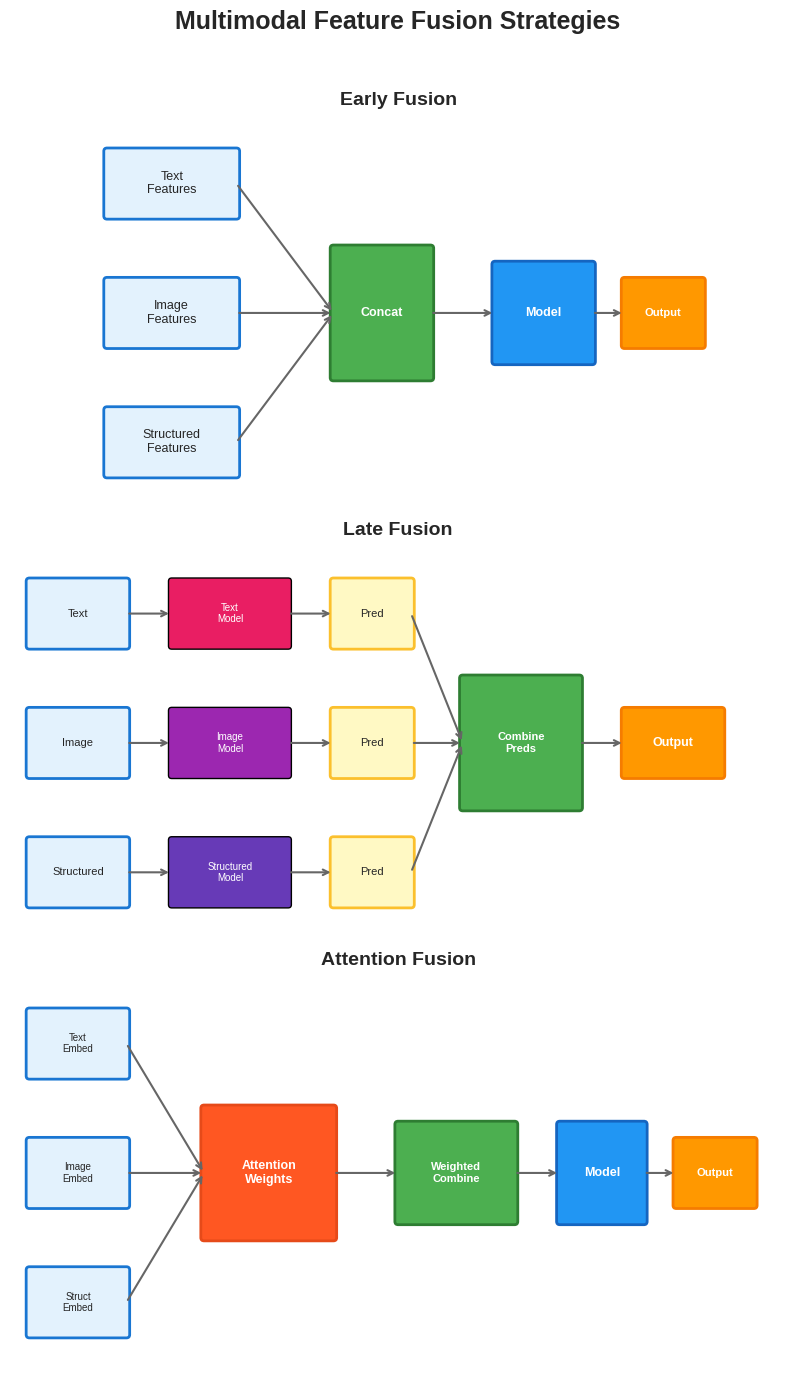

✅ Fusion strategy diagrams generated!


In [17]:
# Fusion Strategy Diagrams
# These diagrams illustrate the three main approaches to multimodal feature fusion

from matplotlib.patches import FancyBboxPatch

def draw_early_fusion(ax):
    """Draw Early Fusion diagram"""
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Early Fusion', fontsize=14, fontweight='bold', pad=10)

    boxes = [
        (0.5, 4.5, 'Text\nFeatures', '#E3F2FD'),
        (0.5, 2.5, 'Image\nFeatures', '#E3F2FD'),
        (0.5, 0.5, 'Structured\nFeatures', '#E3F2FD'),
    ]
    for x, y, label, color in boxes:
        rect = FancyBboxPatch((x, y), 2, 1, boxstyle='round,pad=0.05',
                              facecolor=color, edgecolor='#1976D2', linewidth=2)
        ax.add_patch(rect)
        ax.text(x+1, y+0.5, label, ha='center', va='center', fontsize=9)

    rect = FancyBboxPatch((4, 2), 1.5, 2, boxstyle='round,pad=0.05',
                          facecolor='#4CAF50', edgecolor='#2E7D32', linewidth=2)
    ax.add_patch(rect)
    ax.text(4.75, 3, 'Concat', ha='center', va='center', fontsize=9, color='white', fontweight='bold')

    rect = FancyBboxPatch((6.5, 2.25), 1.5, 1.5, boxstyle='round,pad=0.05',
                          facecolor='#2196F3', edgecolor='#1565C0', linewidth=2)
    ax.add_patch(rect)
    ax.text(7.25, 3, 'Model', ha='center', va='center', fontsize=9, color='white', fontweight='bold')

    rect = FancyBboxPatch((8.5, 2.5), 1.2, 1, boxstyle='round,pad=0.05',
                          facecolor='#FF9800', edgecolor='#F57C00', linewidth=2)
    ax.add_patch(rect)
    ax.text(9.1, 3, 'Output', ha='center', va='center', fontsize=8, color='white', fontweight='bold')

    for y in [5, 3, 1]:
        ax.annotate('', xy=(4, 3), xytext=(2.5, y),
                   arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))
    ax.annotate('', xy=(6.5, 3), xytext=(5.5, 3),
               arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))
    ax.annotate('', xy=(8.5, 3), xytext=(8, 3),
               arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))


def draw_late_fusion(ax):
    """Draw Late Fusion diagram"""
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Late Fusion', fontsize=14, fontweight='bold', pad=10)

    colors = ['#E91E63', '#9C27B0', '#673AB7']
    labels = ['Text', 'Image', 'Structured']
    y_positions = [4.5, 2.5, 0.5]

    for i, (label, y, color) in enumerate(zip(labels, y_positions, colors)):
        rect = FancyBboxPatch((0.3, y), 1.5, 1, boxstyle='round,pad=0.05',
                              facecolor='#E3F2FD', edgecolor='#1976D2', linewidth=2)
        ax.add_patch(rect)
        ax.text(1.05, y+0.5, label, ha='center', va='center', fontsize=8)

        rect = FancyBboxPatch((2.5, y), 1.8, 1, boxstyle='round,pad=0.05',
                              facecolor=color, edgecolor='black', linewidth=1)
        ax.add_patch(rect)
        ax.text(3.4, y+0.5, f'{label}\nModel', ha='center', va='center', fontsize=7, color='white')

        rect = FancyBboxPatch((5, y), 1.2, 1, boxstyle='round,pad=0.05',
                              facecolor='#FFF9C4', edgecolor='#FBC02D', linewidth=2)
        ax.add_patch(rect)
        ax.text(5.6, y+0.5, 'Pred', ha='center', va='center', fontsize=8)

        ax.annotate('', xy=(2.5, y+0.5), xytext=(1.8, y+0.5),
                   arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))
        ax.annotate('', xy=(5, y+0.5), xytext=(4.3, y+0.5),
                   arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))

    rect = FancyBboxPatch((7, 2), 1.8, 2, boxstyle='round,pad=0.05',
                          facecolor='#4CAF50', edgecolor='#2E7D32', linewidth=2)
    ax.add_patch(rect)
    ax.text(7.9, 3, 'Combine\nPreds', ha='center', va='center', fontsize=8, color='white', fontweight='bold')

    rect = FancyBboxPatch((9.5, 2.5), 1.5, 1, boxstyle='round,pad=0.05',
                          facecolor='#FF9800', edgecolor='#F57C00', linewidth=2)
    ax.add_patch(rect)
    ax.text(10.25, 3, 'Output', ha='center', va='center', fontsize=9, color='white', fontweight='bold')

    for y in [5, 3, 1]:
        ax.annotate('', xy=(7, 3), xytext=(6.2, y),
                   arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))
    ax.annotate('', xy=(9.5, 3), xytext=(8.8, 3),
               arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))


def draw_attention_fusion(ax):
    """Draw Attention Fusion diagram"""
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Attention Fusion', fontsize=14, fontweight='bold', pad=10)

    labels = ['Text\nEmbed', 'Image\nEmbed', 'Struct\nEmbed']
    y_positions = [4.5, 2.5, 0.5]

    for label, y in zip(labels, y_positions):
        rect = FancyBboxPatch((0.3, y), 1.5, 1, boxstyle='round,pad=0.05',
                              facecolor='#E3F2FD', edgecolor='#1976D2', linewidth=2)
        ax.add_patch(rect)
        ax.text(1.05, y+0.5, label, ha='center', va='center', fontsize=7)

    rect = FancyBboxPatch((3, 2), 2, 2, boxstyle='round,pad=0.05',
                          facecolor='#FF5722', edgecolor='#E64A19', linewidth=2)
    ax.add_patch(rect)
    ax.text(4, 3, 'Attention\nWeights', ha='center', va='center', fontsize=9, color='white', fontweight='bold')

    rect = FancyBboxPatch((6, 2.25), 1.8, 1.5, boxstyle='round,pad=0.05',
                          facecolor='#4CAF50', edgecolor='#2E7D32', linewidth=2)
    ax.add_patch(rect)
    ax.text(6.9, 3, 'Weighted\nCombine', ha='center', va='center', fontsize=8, color='white', fontweight='bold')

    rect = FancyBboxPatch((8.5, 2.25), 1.3, 1.5, boxstyle='round,pad=0.05',
                          facecolor='#2196F3', edgecolor='#1565C0', linewidth=2)
    ax.add_patch(rect)
    ax.text(9.15, 3, 'Model', ha='center', va='center', fontsize=9, color='white', fontweight='bold')

    rect = FancyBboxPatch((10.3, 2.5), 1.2, 1, boxstyle='round,pad=0.05',
                          facecolor='#FF9800', edgecolor='#F57C00', linewidth=2)
    ax.add_patch(rect)
    ax.text(10.9, 3, 'Output', ha='center', va='center', fontsize=8, color='white', fontweight='bold')

    for y in [5, 3, 1]:
        ax.annotate('', xy=(3, 3), xytext=(1.8, y),
                   arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))
    ax.annotate('', xy=(6, 3), xytext=(5, 3),
               arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))
    ax.annotate('', xy=(8.5, 3), xytext=(7.8, 3),
               arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))
    ax.annotate('', xy=(10.3, 3), xytext=(9.8, 3),
               arrowprops=dict(arrowstyle='->', color='#666', lw=1.5))


# Create the figure with all three diagrams
fig, axes = plt.subplots(3, 1, figsize=(12, 14))
fig.suptitle('Multimodal Feature Fusion Strategies', fontsize=18, fontweight='bold', y=0.98)

draw_early_fusion(axes[0])
draw_late_fusion(axes[1])
draw_attention_fusion(axes[2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print('✅ Fusion strategy diagrams generated!')

### Fusion Strategies Explained

The diagrams above illustrate three common approaches to combining features from multiple data modalities:

**1. Early Fusion (Feature-Level)**
- All features are **concatenated first** into a single feature vector
- A single model learns from the combined representation
- **Pros**: Simple, captures cross-modal interactions
- **Cons**: Requires aligned features, can suffer from curse of dimensionality

**2. Late Fusion (Decision-Level)**
- Each modality has its **own specialized model**
- Individual predictions are combined (e.g., averaging, voting, learned weights)
- **Pros**: Each model can be optimized separately, robust to missing modalities
- **Cons**: Misses cross-modal interactions during learning

**3. Attention Fusion (Learned Weighting)**
- Embeddings from each modality pass through an **attention mechanism**
- The model learns to weight modalities based on their relevance to the task
- **Pros**: Adaptive, captures which modality is most informative for each sample
- **Cons**: More complex, requires more data to train effectively

---
## 15. Multimodal Feature Fusion

In [19]:
def multimodal_fusion(datasets):
    """Combine features from multiple data modalities."""
    print("\n🔗 Fusing features from multiple modalities...")
    fused_df = datasets['products'].copy()

    # Aggregate review data
    review_agg = datasets['reviews'].groupby('product_id').agg(
        avg_rating=('rating', 'mean'),
        review_count=('rating', 'count'),
        rating_std=('rating', 'std')
    ).reset_index()
    fused_df = pd.merge(fused_df, review_agg, on='product_id', how='left')
    print("  - Merged aggregated review data.")

    # Aggregate sales data
    if 'sales' in datasets:
        sales_agg = datasets['sales'].groupby('product_id').agg(
            total_units_sold=('units_sold', 'sum'),
            total_revenue=('revenue', 'sum'),
            num_transactions=('sale_id', 'count')
        ).reset_index()
        fused_df = pd.merge(fused_df, sales_agg, on='product_id', how='left')
        print("  - Merged aggregated sales data.")

    print(f"\nFused dataset shape: {fused_df.shape}")
    return fused_df

retail_mart_datasets = {
    'products': products_df,
    'reviews': reviews_df,
    'sales': sales_df
}
fused_data = multimodal_fusion(retail_mart_datasets)
print("\nSample of fused data:")
print(fused_data[['product_id', 'category', 'price', 'avg_rating', 'review_count', 'total_units_sold']].head())



🔗 Fusing features from multiple modalities...
  - Merged aggregated review data.
  - Merged aggregated sales data.

Fused dataset shape: (5000, 22)

Sample of fused data:
   product_id category  price  avg_rating  review_count  total_units_sold
0  PROD_00001    Books  17.34         5.0           1.0              54.0
1  PROD_00002    Books  10.28         3.5           2.0              41.0
2  PROD_00003    Books  48.63         NaN           NaN              43.0
3  PROD_00004    Books  48.78         4.4           5.0              47.0
4  PROD_00005    Books  15.64         3.8           5.0              62.0


---
## 16. Preprocessing Performance Monitoring

In [21]:
from scipy import stats

class PreprocessingMonitor:
    """Monitor data for drift and quality issues."""
    def __init__(self, reference_df):
        self.reference_df = reference_df
        self.reference_stats = self._get_stats(reference_df)
        print("\n📈 Preprocessing Monitor Initialized.")

    def _get_stats(self, df):
        return {col: {'mean': df[col].mean(), 'std': df[col].std()}
                for col in df.select_dtypes(include=np.number).columns}

    def detect_drift(self, new_df):
        print("\n🔍 Detecting data drift...")
        alerts = []
        for col, stats_ref in self.reference_stats.items():
            if col in new_df.columns:
                new_series = new_df[col].dropna()
                ref_series = self.reference_df[col].dropna()

                ks_stat, p_value = stats.ks_2samp(ref_series, new_series)
                if p_value < 0.05:
                    msg = f"Distribution drift detected in '{col}' (p-value: {p_value:.3f})"
                    alerts.append(msg)
                    print(f"  - ⚠️  {msg}")
        if not alerts:
            print("  - ✅ No significant data drift detected.")
        return alerts

# Simulate a new batch of data with some drift
new_products_df, _, _ = create_retailmart_dataset(n_products=100, n_reviews=100)
new_products_df['price'] *= 1.2  # Price increase

# Monitor for drift
monitor = PreprocessingMonitor(products_df)
drift_alerts = monitor.detect_drift(new_products_df)

✅ Created RetailMart dataset:
   - Products: 100 records
   - Reviews: 100 records
   - Sales: 50,000 records

📈 Preprocessing Monitor Initialized.

🔍 Detecting data drift...
  - ⚠️  Distribution drift detected in 'weight_oz' (p-value: 0.038)


---
## 17. Summary and Best Practices

This notebook provided a comprehensive, hands-on guide to automated data preprocessing and feature engineering.

### Key Best Practices:

* **Profile First**: Always start with comprehensive data profiling and exploratory data analysis (EDA) to understand your data's structure, quality, and patterns. This informs all subsequent preprocessing steps.

* **Automate Data Quality**: Implement automated validation rules to systematically check for issues like missing values, incorrect ranges, and inconsistent formats. This ensures data integrity throughout the ML pipeline.

* **Choose Encoders Wisely**: Use an adaptive approach for categorical encoding. One-hot encoding is suitable for low-cardinality features, while target, binary, or hash encoding is better for high-cardinality features to avoid a feature explosion.

* **Scale Adaptively**: Not all numerical features benefit from the same scaling method. Use robust scalers for skewed data with outliers and standard scalers for more normally distributed features, especially for distance-based algorithms.

* **Engineer with Purpose**: Automated feature generation can create many new features. Use feature selection methods (filter, wrapper) to identify and keep only the most impactful ones, reducing model complexity and improving performance.

* **Fuse Multimodal Data**: When dealing with data from multiple sources (e.g., structured data, text, images), aggregate and fuse them into a single, rich feature set before feeding them into a model.

* **Monitor for Drift**: Data distributions change over time. Implement monitoring to detect statistical drift, which signals that your model may need to be retrained on newer data.